In [1]:
import pandas as pd

In [2]:
campaign = pd.read_csv("campaign.csv")

In [3]:
campaign.head()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,1/1/2018,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,1/1/2018,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,1/1/2018,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,1/1/2018,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,1/1/2018,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True


In [4]:
campaign.describe()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
count,10022,10021,10022,10022,10022,10022,10022,1856,577,1856
unique,7294,31,5,2,2,4,7,31,115,2
top,a100000882,1/15/2018,House Ads,control,False,English,19-24 years,1/16/2018,4/2/2018,True
freq,12,789,4733,5076,8946,9260,1679,163,15,1279


In [5]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10022 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   test_control        10022 non-null  object
 4   converted           10022 non-null  bool  
 5   language_preferred  10022 non-null  object
 6   age_group           10022 non-null  object
 7   date_subscribed     1856 non-null   object
 8   date_canceled       577 non-null    object
 9   is_retained         1856 non-null   object
dtypes: bool(1), object(9)
memory usage: 714.6+ KB


##### How many users receive marketing offers by day?

In [6]:
campaign['date_served']=pd.to_datetime(campaign['date_served'])

In [7]:
daily_users = campaign.groupby(['date_served'])['user_id'].nunique()
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

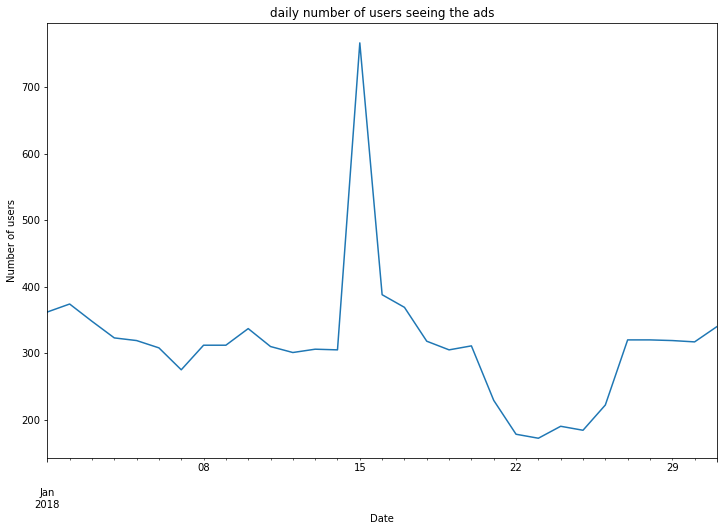

In [8]:
import matplotlib.pyplot as plt

daily_users.plot(figsize=(12,8))

plt.title('daily number of users seeing the ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.show()

##### Conversion Rate

In [9]:
converted = campaign.loc[campaign['converted']==True]['user_id'].nunique()

In [10]:
total = campaign['user_id'].nunique()

In [11]:
conversion_rate = converted / total
print("Overall Conversion Rate:", round(conversion_rate, 3))

Overall Conversion Rate: 0.139


In [12]:
daily_converted_users = campaign.loc[campaign['converted']==True].groupby(['date_served'])['user_id'].nunique()
daily_conversion = daily_converted_users / daily_users

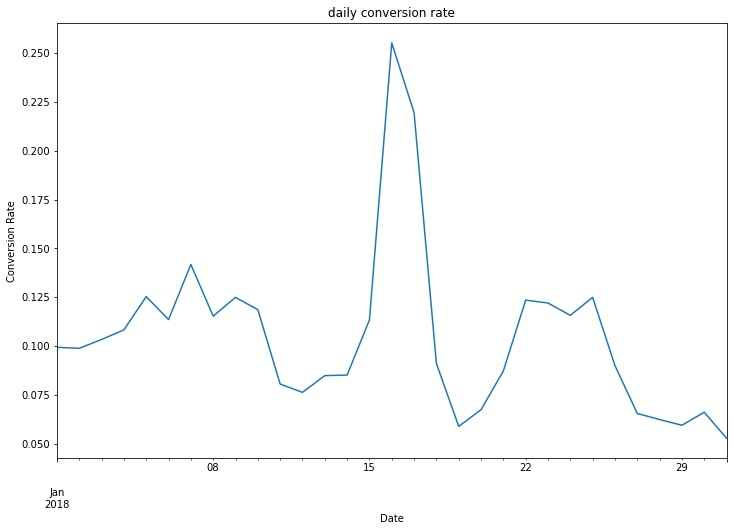

In [13]:
daily_conversion.plot(figsize=(12,8))
plt.title('daily conversion rate')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()

##### Retention Rate

In [14]:
retained = campaign.loc[campaign['is_retained']==True]['user_id'].nunique()

In [15]:
retention_rate = retained / converted
print("Retention Rate:", round(retention_rate, 3))

Retention Rate: 0.668


##### Customer Segmentation analysis

In [16]:
# How many customers are converted in each marketing channel
conversion_by_channel = campaign.loc[campaign['converted']==True].groupby(['marketing_channel'])['user_id'].nunique() / \
                        campaign.groupby(['marketing_channel'])['user_id'].nunique()                  

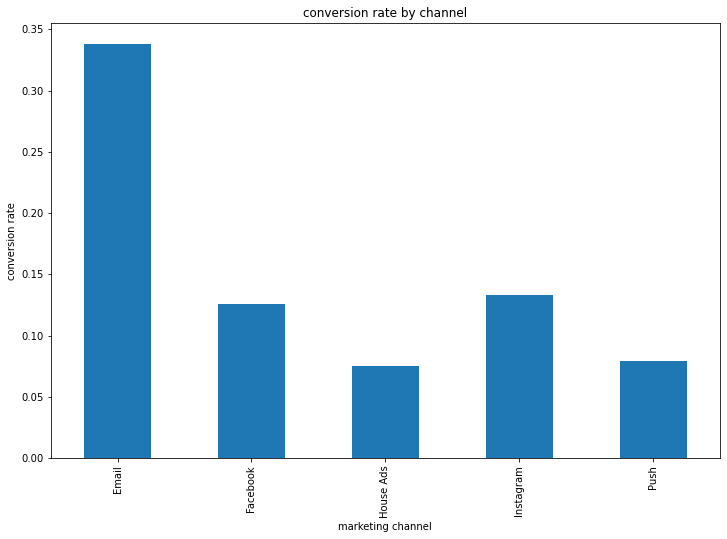

In [17]:
# plot conversion rate by channel:
import matplotlib.pyplot as plt

conversion_by_channel.plot(kind='bar', figsize=(12,8))

plt.title('conversion rate by channel')
plt.xlabel('marketing channel')
plt.ylabel('conversion rate')
plt.show()

In [18]:
# Look at conversion rate by language and age
language_age = campaign.groupby(['language_preferred', 'age_group'])['user_id'].nunique()

In [19]:
language_age_converted = campaign.loc[campaign['converted']==True].groupby(['language_preferred', 'age_group'])['user_id'].nunique()

In [20]:
df_language_age_convt_rate = language_age_converted/language_age

In [21]:
df_language_age_convt_rate = pd.DataFrame(df_language_age_convt_rate.unstack())
df_language_age_convt_rate

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,0.250000,0.111111,0.500000,NaN,0.076923,0.214286,0.058824
English,0.149466,0.231276,0.179625,0.070697,0.065590,0.062500,0.071739
German,0.541667,0.608696,0.586207,0.250000,0.285714,0.300000,0.222222
Spanish,0.162791,0.117647,0.037037,0.087719,0.102564,0.106383,0.205882


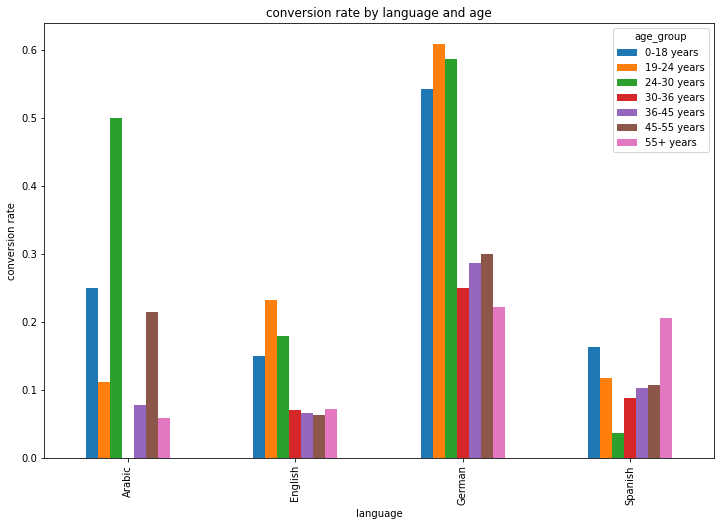

In [22]:
df_language_age_convt_rate.plot(kind='bar', figsize=(12,8))

plt.title('conversion rate by language and age')
plt.xlabel('language')
plt.ylabel('conversion rate')
plt.show()

##### A/B Testing

In [23]:
from scipy import stats
import numpy as np

In [24]:
# Look at Email marketing channel only
email = campaign.loc[campaign['marketing_channel'] == 'Email']

In [25]:
# Compare the conversion rate between test and control group
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()\
/email.groupby(['test_control'])['user_id'].nunique()

test_control
control            0.281481
personalization    0.390845
Name: user_id, dtype: float64

In [26]:
# Calculate the lift = (Test conversion rate - Control conversion rate) / Control converstion rate
lift = (0.390845 - 0.281481)/ 0.281481
print("A/B Testing Lift by Email:", round(lift, 3))

A/B Testing Lift by Email: 0.389


In [27]:
# Look at lift by marketing channel
# Calculate A/B test conversion rate by marketing channel
abtest_conversion_rate = campaign.loc[campaign['converted']==True].groupby( \
                 ['marketing_channel','test_control'])['user_id'].nunique() \
/campaign.groupby(['marketing_channel','test_control'])['user_id'].nunique()

In [28]:
# Calculate the lift by marketing channel
abtest_conversion_rate = pd.DataFrame(abtest_conversion_rate.unstack())
abtest_conversion_rate['lift'] = (abtest_conversion_rate['personalization']-abtest_conversion_rate['control']) \
                                  /abtest_conversion_rate['control']
abtest_conversion_rate.reset_index(inplace=True)
abtest_conversion_rate

test_control,marketing_channel,control,personalization,lift
0,Email,0.281481,0.390845,0.388529
1,Facebook,0.054374,0.190275,2.499403
2,House Ads,0.083052,0.064982,-0.217572
3,Instagram,0.044311,0.212500,3.795608
4,Push,0.028139,0.126923,3.510651


In [29]:
lift_sr = pd.Series(abtest_conversion_rate['lift'].values, index=abtest_conversion_rate['marketing_channel'])
lift_sr

marketing_channel
Email        0.388529
Facebook     2.499403
House Ads   -0.217572
Instagram    3.795608
Push         3.510651
dtype: float64

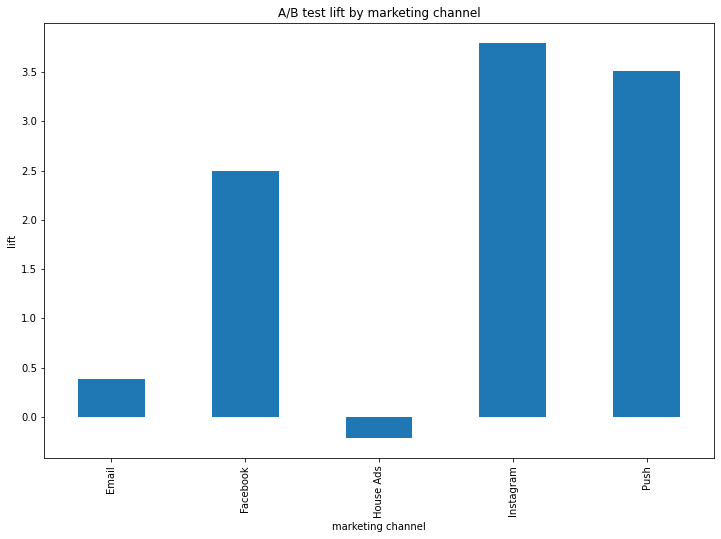

In [30]:
# plot
lift_sr.plot(kind='bar', figsize=(12,8))

# annotate
plt.title('A/B test lift by marketing channel')
plt.xlabel('marketing channel')
plt.ylabel('lift')
plt.show()

**Statistical hypothesis testing**
Student's t-test, or simply the t-test, is frequently used to test whether the difference between two tests is statistically significant. The t-test compares the two averages and examines whether they are significantly different from each other

There are two important statistics in a t-test: the t-value and p-value. 
- The t-value measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference there is between the two groups. 

- On the other hand, the p-value measures the probability that the results would occur by chance. The smaller the p-value is, the more statistically significant difference there will be between the two groups.

In [31]:
t, p = stats.ttest_ind(
    email.loc[email['test_control'] == 'personalization', 'converted'].values, 
    email.loc[email['test_control'] == 'control', 'converted'].values, 
    equal_var=False
)
# the stats module from the scipy package has a function named ttest_ind. 
# This function computes t-value and p-value, given the data

In [32]:
print(p)

0.015550470284327801


Generally speaking, null hypothesis is that the two groups show no statistically significant difference. On the other hand, the alternate hypothesis states that the two groups show a statistically significant difference. **When the t-value is larger than a threshold and the p-value is smaller than a threshold, we say that we can reject the null hypothesis and that the two groups show a statistically significant difference**. Typically, 0.01 or 0.05 are used as the p-value thresholds for testing statistical significance. If the p-value is less than 0.05, then it suggests that there is less than 5% probability that the difference between the two groups occurs by chance. In other words, the difference is highly unlikely to be by chance